# Анализ компьютерных игр в интернет-магазине

## 1. Обзор данных

**Импорты**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats as st
import warnings
warnings.filterwarnings('ignore')

**Таблица**

In [2]:
df = pd.read_csv('games.csv')

In [3]:
df.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


**Что обработать:**
1. **Названия столбцов:** к нижнему регистру
2. **name:** пропуски, написание названий
3. **platform:** написание названий, к нижнему регистру
4. **year_of_release:** пропуски, int
5. **genre:** пропуски, написание названий, к нижнему регистру
6. **critic_score:** пропуски, тип данных (точно нужен float?), аномальные значения
7. **user_score:** пропуски, float (to_numeric), аномальные значения
8. **rating:** пропуски, написание названий
9. **дубликаты**
10. **рассчеты:** посчитать суммарные продажи во всех регионах и записать их в отдельный столбец.

## 2. Предобработка

**Названия столбцов.**
Приведем все названия к нижнему регистру для удобства обращения

In [5]:
df.columns = df.columns.str.lower()

### Столбец Name

#### Пропуски

In [6]:
df[df['name'].isna() == True]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


Пропуска всего два, а в строчках так же отсутствует жанр, оценки и рейтинг. Кажется, эти строчки бесполезны для нас. Удалим. 

Почему пропуски появились ответить сложно: их всего два и никаких заметных закономероностей нет. Видимо случайность. 

In [7]:
df.dropna(subset=['name'], inplace=True)

#### Написание названий

Все названия сложные и иногда состоят из большого количества слов. Попробуем базово проверить - изменит ли что-то приведение названий к строчным буквам. 

In [8]:
print('Количество уникальных названий:', df['name'].nunique())
print('Количество уникальных названий (маленькие буквы):', df['name'].str.lower().nunique())

Количество уникальных названий: 11559
Количество уникальных названий (маленькие буквы): 11559


Ничего не изменилось. Если ошибки и есть, то они будут выражены иначе. Визуально проходиться по всем названиям - неэффективно, поэтому оставим как есть. 

### Столбец Platform

Посмотрим как написаны названия. 

In [9]:
df['platform'].unique()

array(['Wii', 'NES', 'GB', 'DS', 'X360', 'PS3', 'PS2', 'SNES', 'GBA',
       'PS4', '3DS', 'N64', 'PS', 'XB', 'PC', '2600', 'PSP', 'XOne',
       'WiiU', 'GC', 'GEN', 'DC', 'PSV', 'SAT', 'SCD', 'WS', 'NG', 'TG16',
       '3DO', 'GG', 'PCFX'], dtype=object)

Повторений нет, но для удобства обращения - приведем к нижнему регистру

In [10]:
df['platform'] = df['platform'].str.lower()

### Столбец year_of_release

#### Пропуски

In [11]:
df[df['year_of_release'].isna() == True].head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
183,Madden NFL 2004,ps2,NaN,Sports,4.26,0.26,0.01,0.71,94.0,8.5,E
377,FIFA Soccer 2004,ps2,NaN,Sports,0.59,2.36,0.04,0.51,84.0,6.4,E
456,LEGO Batman: The Videogame,wii,NaN,Action,1.80,0.97,0.00,0.29,74.0,7.9,E10+
475,wwe Smackdown vs. Raw 2006,ps2,NaN,Fighting,1.57,1.02,0.00,0.41,NaN,NaN,NaN
609,Space Invaders,2600,NaN,Shooter,2.36,0.14,0.00,0.03,NaN,NaN,NaN


Процент пропусков

In [12]:
len(df[df['year_of_release'].isna() == True]) / len(df)

0.016095255190570215

1,6% данных с пропусками в этом столбце. Кажется, что появление пропусков ни с чем не связано: просто случайность (забыли вбить или потеряли из-за ошибки). 

Заменить пропуски не получится. Удалять сейчас - не имеет смысла, ведь на следующем шаге мы все равно будем вынуждены избавиться от наблюдений без даты: нам предстоит анализировать данные по годам (они просто не войдут). Оставим их, ведь эти наблюдения содержат другие полезные данные. Вдруг нам все таки они понадобятся. 

И переведем столбец в целые числа.

In [13]:
df['year_of_release'] = df['year_of_release'].astype('Int64')

### Столбец genre

К моменту как мы удалили пропуски в других столбцах, пропуски в этом исчезли сами собой. Разберемся с написанием названий жанров. 

In [14]:
df['genre'].unique()

array(['Sports', 'Platform', 'Racing', 'Role-Playing', 'Puzzle', 'Misc',
       'Shooter', 'Simulation', 'Action', 'Fighting', 'Adventure',
       'Strategy'], dtype=object)

Повторений нет. Для удобства обращения сделаем их с маленькой буквы. 

In [15]:
df['genre'] = df['genre'].str.lower()

### Cтолбец Critic_score

#### Пропуски

Пропусков много и чаще всего, если пропуск есть в столбце 'critic_score', то он есть и в 'user_score', а так же в 'rating'

In [16]:
print('Пропусков критиков:', len(df[df['critic_score'].isna() == True]))
print('Пропусков критиков + юзеров:', len(df[(df['critic_score'].isna() == True) & (df['user_score'].isna() == True)]))
print('Проупсков критиков + рейтинга:', len(df[(df['critic_score'].isna() == True) & (df['rating'].isna() == True)]))

Пропусков критиков: 8576
Пропусков критиков + юзеров: 6661
Проупсков критиков + рейтинга: 6681


Отсутствие этих значений не связано ни с годом выпуска игры (вдруг раньше не учитывали), ни с жанром, ни с платформой. Судя по тому, что пропуски в нескольких столбцах чаще всего идут вместе, видимо их отсутствие взаимосвязано. Возможно - по конкретно этим играм нет оценок (редкая платформа; редкий жанр; мало внимание к игре; продается только в одном регионе, где такие данные не собирают). Либо просто забыли перенести. 

Заменять их медианой или средним (даже сгруппировав по жанру или платформе) - очень грубо и может исказить данные, поэтому оставим как есть. 

#### Тип данных и аномальные значения

In [17]:
df['critic_score'].describe()

count    8137.000000
mean       68.967679
std        13.938165
min        13.000000
25%        60.000000
50%        71.000000
75%        79.000000
max        98.000000
Name: critic_score, dtype: float64

Данные не выходят за пределы обозначенных границ

In [18]:
df['critic_score'].unique()

array([76., nan, 82., 80., 89., 58., 87., 91., 61., 97., 95., 77., 88.,
       83., 94., 93., 85., 86., 98., 96., 90., 84., 73., 74., 78., 92.,
       71., 72., 68., 62., 49., 67., 81., 66., 56., 79., 70., 59., 64.,
       75., 60., 63., 69., 50., 25., 42., 44., 55., 48., 57., 29., 47.,
       65., 54., 20., 53., 37., 38., 33., 52., 30., 32., 43., 45., 51.,
       40., 46., 39., 34., 35., 41., 36., 28., 31., 27., 26., 19., 23.,
       24., 21., 17., 22., 13.])

Дробных значений нет, а следовательно можно перевести столбец в int

In [19]:
df['critic_score'] = df['critic_score'].astype('Int64')

### Столбец user_score 

Пропуски рассматривать не будем: их природа судя по всему похожа на природу пропусков в 'critic_score'. Удалять их мы не собираемся. Изменим тип данных и проверим на аномальные значения. 

#### Тип данных
Object нужно привести к float или int?. Посмотрим. 

In [20]:
df['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

Переводить в целые числа нельзя. Оценки пользователей идут с дробной частью.

Есть нюанс - значение tbd. Эта аббревиатура означает, что значение "будет определено". Для анализа это нам ни о чем не говорит, но и заменить эту аббревиатуру на какую-то цифру мы не можем. Поэтому при переводе в числовое значение мы превратим tbd в NaN с помощью атрибута errors. 

In [21]:
df['user_score'] = pd.to_numeric(df['user_score'], errors='coerce')

#### Аномалии

In [22]:
df['user_score'].describe()

count    7590.000000
mean        7.125046
std         1.500006
min         0.000000
25%         6.400000
50%         7.500000
75%         8.200000
max         9.700000
Name: user_score, dtype: float64

Здесь все в порядке. Максимум и минимум не выходят за пределы. 

### Столбец rating

Пропуски в последних трех столбцах мы решили не заменять. Разберемся только с названиями. 

In [23]:
df['rating'].unique()

array(['E', nan, 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'], dtype=object)

Дубликатов и ошибок нет. сделаем их с маленькой буквы для удобства обращения. 

In [24]:
df['rating'] = df['rating'].str.lower()

### Дубликаты

In [25]:
df.duplicated().sum()

0

Полных дубликатов нет.

### Рассчеты
Посчитаем суммарные продажи по регионам и запишем в отдельный столбец

In [26]:
df['total_sales'] = df['na_sales'] + df['eu_sales'] + df['jp_sales'] + df['other_sales']

Предобработка закончена!

In [27]:
df.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,wii,2006,sports,41.36,28.96,3.77,8.45,76,8.0,e,82.54
1,Super Mario Bros.,nes,1985,platform,29.08,3.58,6.81,0.77,<NA>,NaN,NaN,40.24
2,Mario Kart Wii,wii,2008,racing,15.68,12.76,3.79,3.29,82,8.3,e,35.52
3,Wii Sports Resort,wii,2009,sports,15.61,10.93,3.28,2.95,80,8.0,e,32.77
4,Pokemon Red/Pokemon Blue,gb,1996,role-playing,11.27,8.89,10.22,1.00,<NA>,NaN,NaN,31.38


In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16713 entries, 0 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16713 non-null  object 
 2   year_of_release  16444 non-null  Int64  
 3   genre            16713 non-null  object 
 4   na_sales         16713 non-null  float64
 5   eu_sales         16713 non-null  float64
 6   jp_sales         16713 non-null  float64
 7   other_sales      16713 non-null  float64
 8   critic_score     8137 non-null   Int64  
 9   user_score       7590 non-null   float64
 10  rating           9949 non-null   object 
 11  total_sales      16713 non-null  float64
dtypes: Int64(2), float64(6), object(4)
memory usage: 1.7+ MB


## 3. Исследовательский анализ

### Количество игр в разные годы

Построим диаграмму, чтобы увидеть распределение выпускаемых игр по годам. 

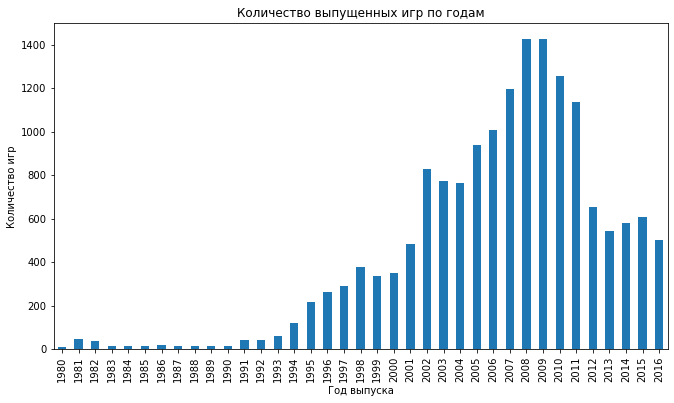

In [29]:
df.groupby('year_of_release')['name'].count().plot(kind='bar', figsize=(11,6))
plt.title('Количество выпущенных игр по годам')
plt.ylabel('Количество игр')
plt.xlabel('Год выпуска')
pass

Если не брать в рассчет первые годы, то количество игр плавно возрастает с течением времени, но в 2012 происходит какой-то спад и следующие 5 лет количество игр держится примерно в одном диапозоне. **Для прогноза на ОДИН следующий год корректнее взять только эти последние 5 лет.**

Но, это предварительный вывод. Следующим шагом мы еще посмотрим продажи по платформам. До этого этапа можно исключить из таблицы данные до 1990 года. Игр там выпускалось очень мало (только с 1991 их количество начинает возрастать) - эти данные малозначимые. Для этого создадим новый фрейм (вдруг нам потребуется вернуться к исходному). 

In [30]:
data = df[df['year_of_release'] > 1990].reset_index(drop=True)

### Продажи по платформам

Построим график распределения продаж по платформам, чтобы определить только самые топовые. 

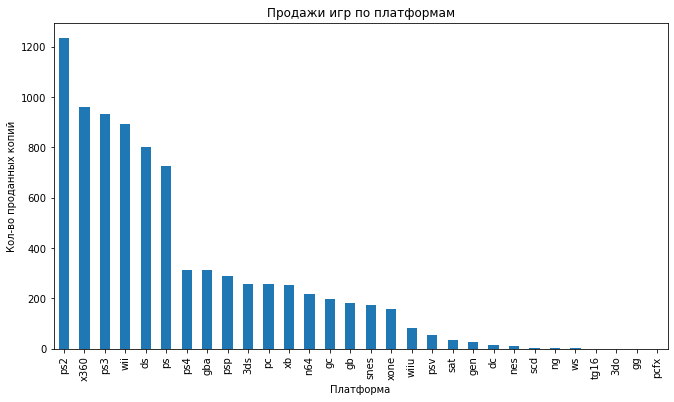

In [31]:
top_platforms = data.groupby('platform')['total_sales'].sum().sort_values(ascending=False)
top_platforms.plot(kind='bar', figsize=(11,6))
plt.title('Продажи игр по платформам')
plt.ylabel('Кол-во проданных копий')
plt.xlabel('Платформа')
pass

Видим 6 топовых платформ (после 6-ой - резкий спад). Возьмем только их и посмотрим распределение по годам. 

Выделим имена в отедельный список.

In [32]:
top_platform_names = top_platforms.head(6).index

Отберем только те наблюдения, в которых находятся соответствующие платформы, затем построим сводную таблицу и выведем график, где: по Х - годы, по Y - количество копий игр, вышедших на платформе (в млн.). 

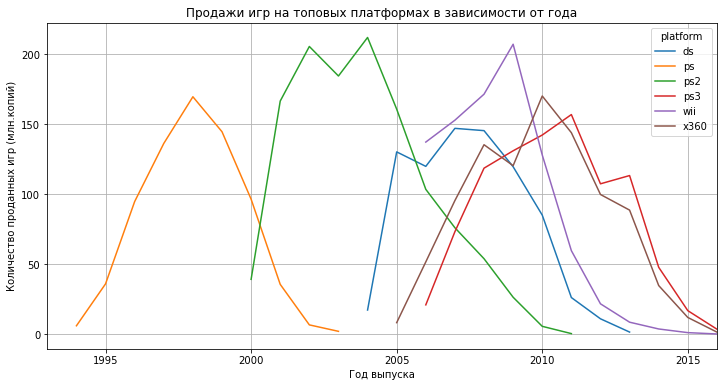

In [33]:
data.query('platform in @top_platform_names').pivot_table(index='year_of_release', 
                                                    columns='platform', 
                                                    values='total_sales', 
                                                    aggfunc='sum').plot(figsize=(12,6), 
                                                                          xlim=(1993, 2016),
                                                                         grid=True)
plt.title('Продажи игр на топовых платформах в зависимости от года')
plt.ylabel('Количество проданных игр (млн.копий)')
plt.xlabel('Год выпуска')
pass

**Выводы**
- Количество продаваемых копий падает почти в ДВА раза в 2012 году, а затем держится в одном диапозоне;
- Среднее время жизни платформы - 7-11 лет
- Для прогноза на 2017 год, нам действительно имеет смысл взять данные только с 2012 года (окончательно пропадает ps2,  значительно падают продажи xbox и ps3)

### Отбор данных для анализа

Создадим новый фрейм (вдруг нам потребуется вернуться к исходному) и оставим там только данные, начинася с 2012 года. 

In [34]:
data = data[data['year_of_release'] > 2011].reset_index(drop=True)

### Лидеры по продажам
Сделаем сводную табличку и построим по ней график. Он будет похож на предыдущий за исключением того, что мы оставили только данные с 2012 года и взяли все платформы. 

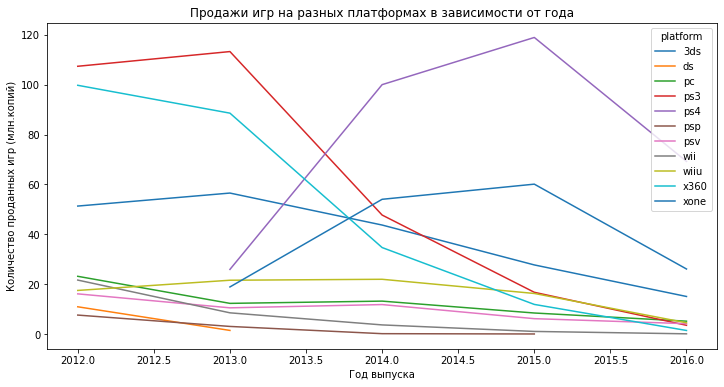

In [35]:
data.pivot_table(index='year_of_release', 
                 columns='platform', 
                 values='total_sales', 
                 aggfunc='sum').plot(figsize=(12,6))
plt.title('Продажи игр на разных платформах в зависимости от года')
plt.ylabel('Количество проданных игр (млн.копий)')
plt.xlabel('Год выпуска')
pass

На графике очень наглядно виден ответ на вопрос:
1. Продажи на всех платформах падают
2. Есть платформы, которые не растут и не падают, а скорее находятся в одном состоянии. Это линии - которые ползут "по полу" на протяжении всего графика.
2. Продажи PS3, xBox360 и 3DS падают. 
3. Продажи xBoxOne и PS4 падают, но при этом - они росли до 2015 года, а сейчас остаются в лидерах. 

График помог нам увидеть рост и падение. Посмотрим на лидеров по продажам безотносительно динамики. 

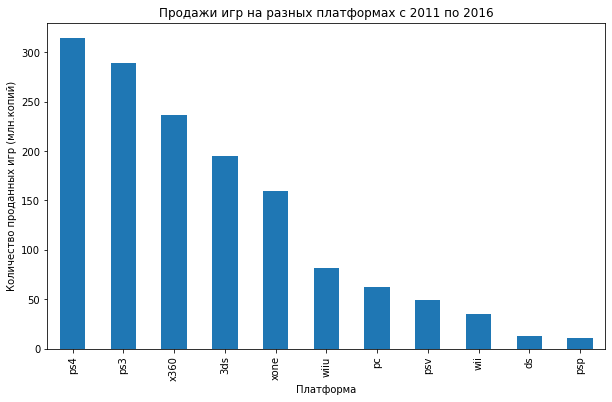

In [36]:
data.groupby('platform')['total_sales'].sum().sort_values(ascending=False).plot(kind='bar', figsize=(10,6))
plt.title('Продажи игр на разных платформах с 2011 по 2016')
plt.ylabel('Количество проданных игр (млн.копий)')
plt.xlabel('Платформа')
pass

- По продажам с 2012 года в лидерах PlayStation. Обе их приставки занимают первые две строчки. 
- На третьем месте идет xbox 360, но это скорее отстаточное явление. В 2017 году продажи этой консоли точно будут ниже, чем xbox one (xone). 
- Не смотря на то, что ps3 занимает второе место, к 2017 году их продажи тоже упали на уровень платформ, которые "ползут по полу". 
- 3DS тоже падает, но к 2015-2016 году выходит на 3 строчку. 

#### Вывод

В 2017 году считаю самыми перспективными  3 платформы:
1. PS4
2. Xbox One
3. 3DS

### Продажи игр по платформам

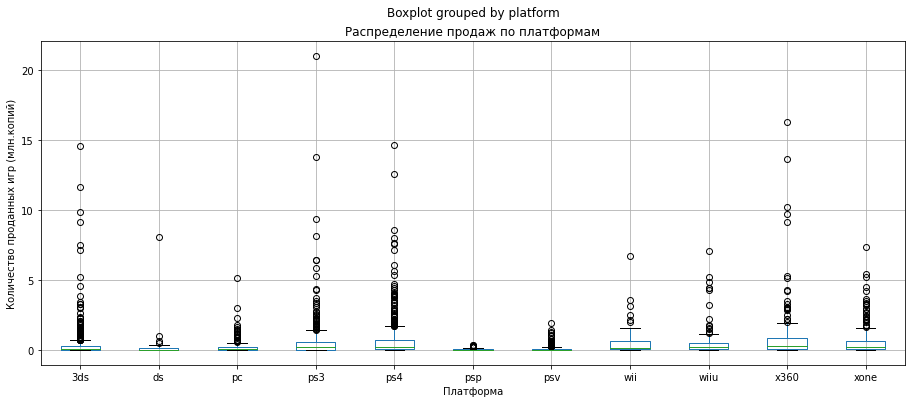

In [37]:
data.boxplot(by='platform', column='total_sales', figsize=(15,6))
plt.title('Распределение продаж по платформам')
plt.ylabel('Количество проданных игр (млн.копий)')
plt.xlabel('Платформа')
pass

Из-за большого количества разных платформ и сильных выбросов на некоторых из них, масштаб графика стал очень большой. Это мешает изучить основную массу (коробку и усы). Уберем выбросы и посмотрим еще раз. 

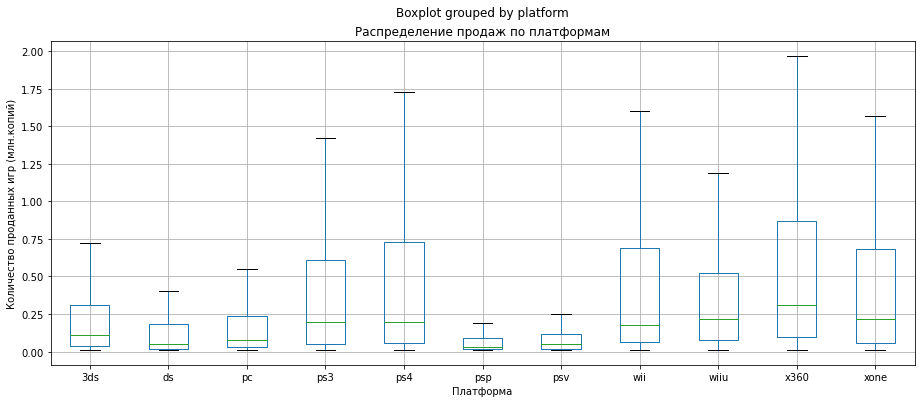

In [38]:
data.boxplot(by='platform', column='total_sales', figsize=(15,6), showfliers=False)
plt.title('Распределение продаж по платформам')
plt.ylabel('Количество проданных игр (млн.копий)')
plt.xlabel('Платформа')
pass

#### Вывод

1. Большая часть игр продается в количестве где-то до 1 млн копий (реже - до 2 млн).
2. На топовых платформах куда чаще встречаются игры, продажи которых могут подниматься далеко от медианных значений (длинная плотная колбаса из точек и единичные точки в верхней части графика).
3. Лишь две игры имеют продажи больше, чем 15 миллионов копий. А на самом деле это даже одна игра, просто на разных платформах (GTA V, разумеется).
4. Интересное наблюдение про платформу 3ds: ее коробка и усы ниже, чем у wii и wiiu. Однако суммарно по продажам 3ds сильно обходит их. Все за счет выбросов. Игры среднячки - это основной костяк, но в лидеры выводят именно единичные крутые игры. 
5. Общий вывод: платформу в первую очередь "вытягивают в топ" крутые единичные игры. 

### Влияние отзывов на продажи
**Цель:** выяснить как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков.

**Задачи:**
- Построить диаграмму рассеяния и посчитать корреляцию между отзывами и продажами
- Сформулировать выводы.

Сейчас нам предстоит множество однотипных операций, поэтому для удобства сделаем функцию, которая показывать нужные нам сравнения. 

In [39]:
def platform_score_show_stat(platform):
    platform_data = df.query('platform == @platform')[['name', 'total_sales', 'critic_score', 'user_score']]
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14,4))
    ax1.set_title('Диаграмма №1')
    ax1.set_xlabel('Оценки критиков')
    ax1.set_ylabel('Продажи (млн. копий)')
    ax1.scatter(platform_data['critic_score'].astype('float'), platform_data['total_sales'])

    ax2.set_title('Диаграмма №2')
    ax2.set_xlabel('Оценки пользователей')
    ax2.set_ylabel('Продажи (млн. копий)')
    ax2.scatter(platform_data['user_score'], platform_data['total_sales'])

    pass
    display(platform_data.corr().round(2))

#### Отзывы и продажи: ps4

,total_sales,critic_score,user_score
total_sales,1.00,0.41,-0.03
critic_score,0.41,1.00,0.56
user_score,-0.03,0.56,1.00


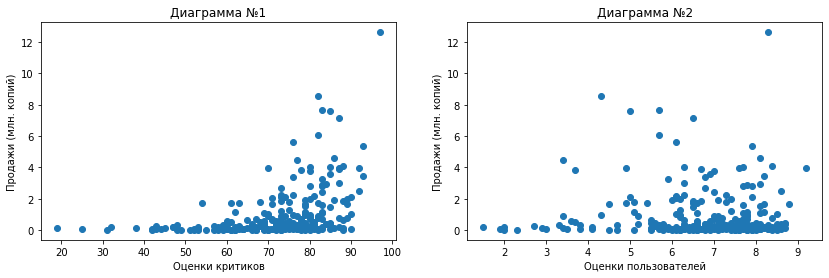

In [40]:
platform_score_show_stat('ps4')

#### Отзывы и продажи: xbox 360

,total_sales,critic_score,user_score
total_sales,1.00,0.39,0.11
critic_score,0.39,1.00,0.62
user_score,0.11,0.62,1.00


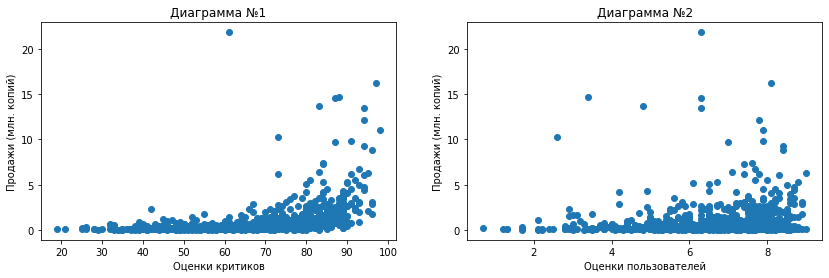

In [41]:
platform_score_show_stat('x360')

#### Отзывы и продажи: ps3

,total_sales,critic_score,user_score
total_sales,1.00,0.43,0.13
critic_score,0.43,1.00,0.63
user_score,0.13,0.63,1.00


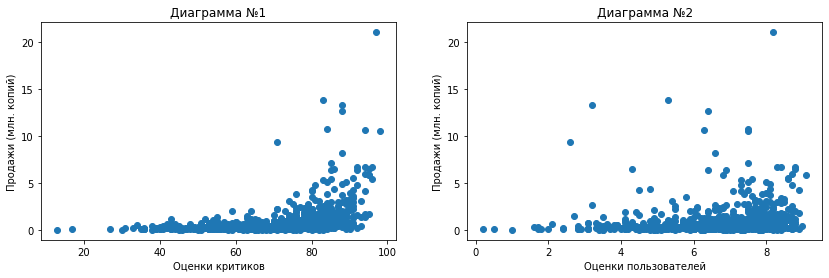

In [42]:
platform_score_show_stat('ps3')

#### Отзывы и продажи: xbox one

,total_sales,critic_score,user_score
total_sales,1.00,0.42,-0.07
critic_score,0.42,1.00,0.47
user_score,-0.07,0.47,1.00


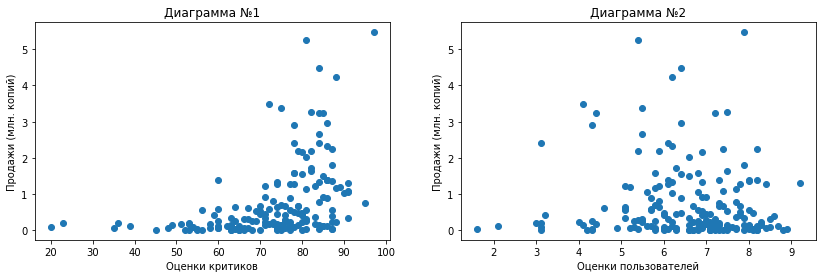

In [43]:
platform_score_show_stat('xone')

#### Отзывы и продажи: 3ds

,total_sales,critic_score,user_score
total_sales,1.00,0.35,0.22
critic_score,0.35,1.00,0.74
user_score,0.22,0.74,1.00


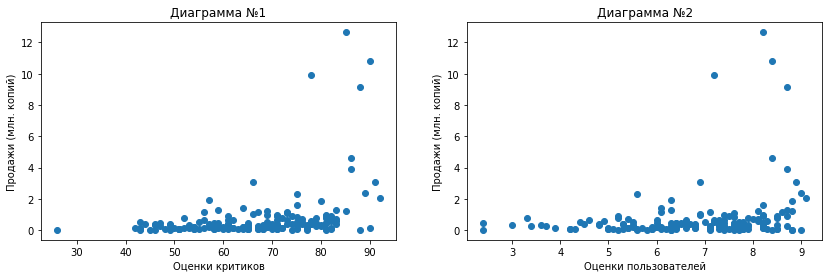

In [44]:
platform_score_show_stat('3ds')

#### Отзывы и продажи: dc

,total_sales,critic_score,user_score
total_sales,1.00,0.35,-0.30
critic_score,0.35,1.00,-0.16
user_score,-0.30,-0.16,1.00


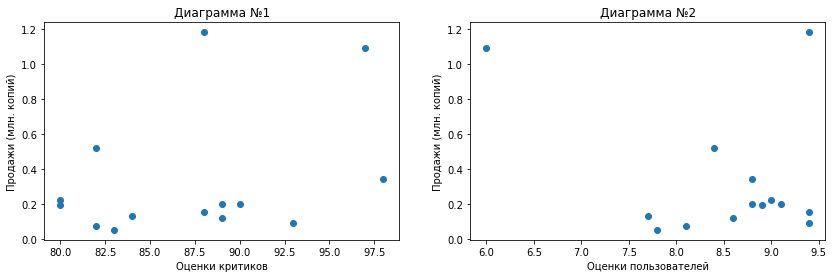

In [45]:
platform_score_show_stat('dc')

Здесь в целом очень мало данных, чтобы делать какой-то вывод

#### Отзывы и продажи: pс

,total_sales,critic_score,user_score
total_sales,1.00,0.26,0.01
critic_score,0.26,1.00,0.56
user_score,0.01,0.56,1.00


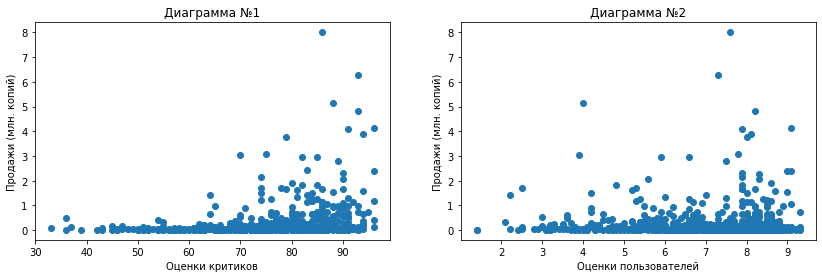

In [46]:
platform_score_show_stat('pc')

#### Отзывы и продажи: psp

,total_sales,critic_score,user_score
total_sales,1.00,0.32,0.22
critic_score,0.32,1.00,0.54
user_score,0.22,0.54,1.00


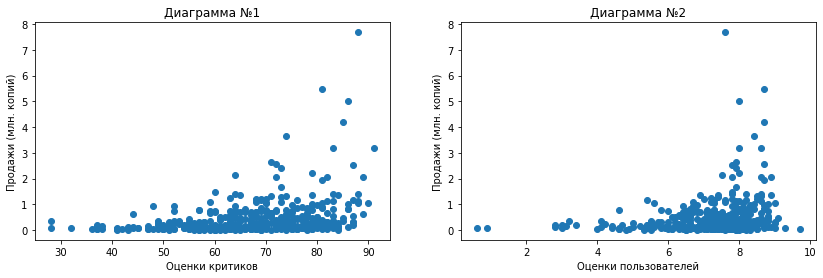

In [47]:
platform_score_show_stat('psp')

#### Отзывы и продажи: psv

,total_sales,critic_score,user_score
total_sales,1.00,0.13,0.01
critic_score,0.13,1.00,0.73
user_score,0.01,0.73,1.00


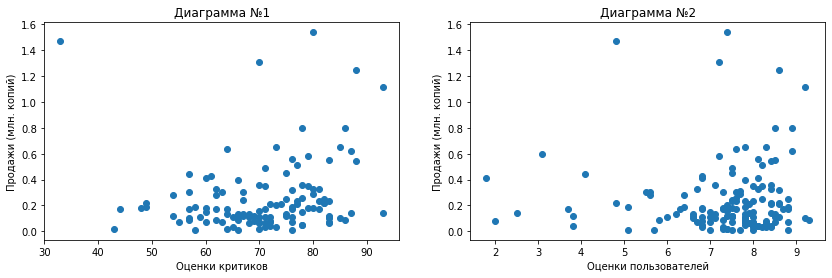

In [48]:
platform_score_show_stat('psv')

#### Отзывы и продажи: wii

,total_sales,critic_score,user_score
total_sales,1.00,0.18,0.11
critic_score,0.18,1.00,0.68
user_score,0.11,0.68,1.00


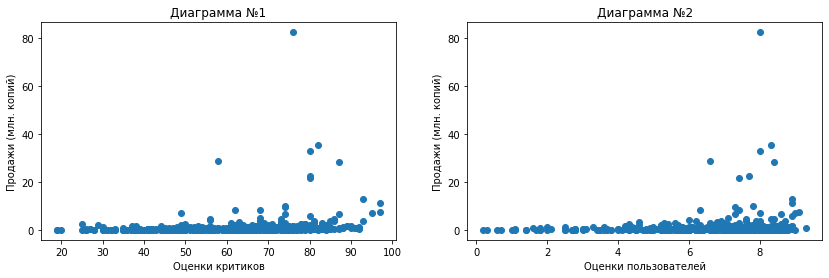

In [49]:
platform_score_show_stat('wii')

#### Отзывы и продажи: wiiu

,total_sales,critic_score,user_score
total_sales,1.00,0.35,0.40
critic_score,0.35,1.00,0.77
user_score,0.40,0.77,1.00


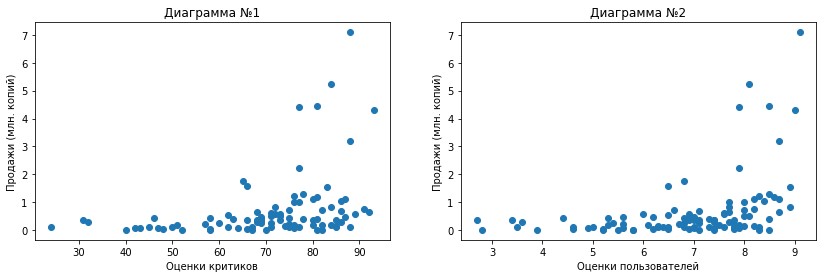

In [50]:
platform_score_show_stat('wiiu')

#### Общий вывод по платформам

1. **Оценки критиков и продажи** стабильно показывают слабо-умеренную связь на разных платформах. График рассеяния (за парой исключений) повторяет один и тот же паттерн. До оценки 60-70 баллов высокопродаваемых игр нет, а затем они начинают появляться. Одинаковая "горочка" видна в конце почти каждого графика.
2. **Оценки пользователей и продажи** чаще показывают слабую связь или связи вовсе нет. При этом на нескольких платформах (dc, 3ds, psp) она все показывает значение корреляции больше 0.2. А на платформе wiiu - 0.4, что даже превышает корреляцию оценок критиков и продаж. 
3. **Генеральный вывод:** оценки критиков влияют на продажи больше, чем оценки пользователей. 

### Анализ жанров
**Задача:** Посмотреть на общее распределение игр по жанрам. Что можно сказать о самых прибыльных жанрах? Выделяются ли жанры с высокими и низкими продажами?

Подготовим данные. Создадим сводную табличку и посчитаем в ней общее количество проданных копий и общее количество выпущенных игр для каждого жанра. Заменим названия столбцов.

In [51]:
genre_data = data.pivot_table(index='genre', values='total_sales', aggfunc=['sum', 'count'])
genre_data.columns = ['total_sales', 'total_games']

Теперь изучим эту таблицу с разных сторон, каждый раз сортируя ее по нужному параметру. 

#### Total_sales | Суммарные продажи игр по жанрам

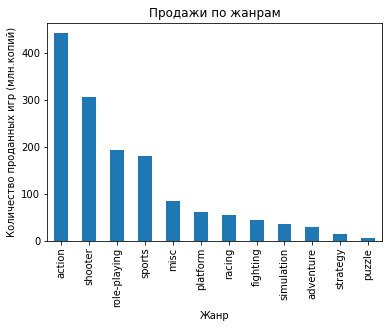

In [52]:
genre_data.sort_values(by='total_sales', ascending=False)['total_sales'].plot(kind='bar')
plt.title('Продажи по жанрам')
plt.ylabel('Количество проданных игр (млн.копий)')
plt.xlabel('Жанр')
pass

**Вывод:** Больше всего игр продается в жанре Action и Shooter. В конце списка: симуляторы, приключения, стратегии и пазлы. А что с количеством выпущенных игр? Посмотрим. 

#### Total_games | Суммарное количество выпущенных игр по жанрам

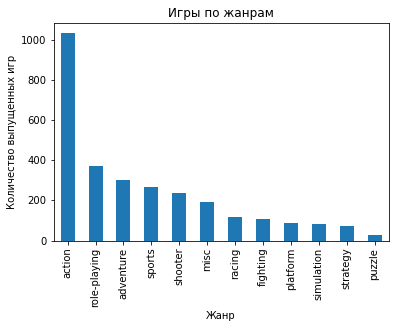

In [53]:
genre_data.sort_values(by='total_games', ascending=False)['total_games'].plot(kind='bar')
plt.title('Игры по жанрам')
plt.ylabel('Количество выпущенных игр')
plt.xlabel('Жанр')
pass

**Вывод:** Экшены показывают лидерство, а вот жанр Adventure, например, резко поднимается вверх по количеству игр. Все остальное, в целом, без изменений. Четверка лидеров и аутсайдеров (не считая переметнувшегося снизу вверх жанра Adventure) осталась неизменной. 


#### Sales per game | Средние продажи одной игры по жанрам: "привлекательность жанра"

**Теперь немного дополним таблицу и посмотрим еще один параметр.** Мы не можем говорить о "прибыльности жанра", ведь прибыль считают по выручке и издержкам, а такими данными мы не обладаем. Зато мы можем посчитать показатель, косвенно говорящий о прибыльности. Разделим количество проданных копий на количество выпущенных игр в каждом жанре. Получим что-то вроде оценки привлекательности жанра. Это будет чуть более объективная оценка каждого жанра. 

In [54]:
genre_data['sales_per_game'] = round(genre_data['total_sales'] / genre_data['total_games'], 2)

И теперь посмотрим график по этому столбцу

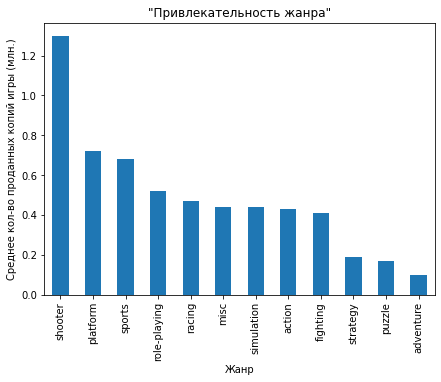

In [55]:
genre_data.sort_values(by='sales_per_game', ascending=False)['sales_per_game'].plot(kind='bar', 
                                                                                    figsize=(7,5))
plt.title('"Привлекательность жанра"')
plt.ylabel('Среднее кол-во проданных копий игры (млн.)')
plt.xlabel('Жанр')
pass

#### Выводы

1. Больше всего игр выпускается и продается в жанре Action
2. В вершине списка по количеству выпущенных игр и количеству проданных копий также role-playing, sport и shooter
3. Аутсайдеры по продажам и количеству игр: симуляторы, стратегии, пазлы
4. Жанр Adventure находится в нижней части рейтинга по проданным копиям, зато поднимается наверх по количеству игр. 
5. Самый "привлекательны"й жанр - Шутеры. Среднее количество проданных копий для одной игры в этом жанре опережает аналогичный показатель у второго жанра по списку почти в 2 раза. Наверх по "привлекательности" так же вышел жанр "platform". Экшены, лидировавшие в двух предыдущих показателях сейчас в середине списка. Наименее "привлекательные": пазлы, стратегии и тот самый жанр Adventure. 

Выбирая жанры, определяющие успешность игры, я бы выделил такие, которые одновременно и продаются в большом количестве штук, и имеют большую привлекательность. Например, жанр platform занимает второе место по привлекательности, но при этом продается и выпускается в очень маленьком количестве. Будет неверным сделать ставку на него и забыть про Экшены, которые хоть и имеют меньшую привлекательность, но зато выпускаются и продаются в разы больше. Нужен баланс. Поэтому выделяю перспективными следующие жанры:
- Shooter
- Sports
- Role-Playing
- Action

## Портрет пользователя
Определяем для пользователя каждого региона (NA, EU, JP):
- Самые популярные платформы (топ-5). Описать различия в долях продаж.
- Самые популярные жанры (топ-5). Пояснить разницу.
- Влияет ли рейтинг ESRB на продажи в отдельном регионе?

Для каждого региона сейчас будет выполняться одна и та же последовательность, поэтому напишем функцию. Она будет показывать 5 платформ, 5 жанров и все рейтинги по убыванию количества проданных копий игр с ними. 

In [56]:
def show_stat(region_sales):
    print('ТОП-5 платформ')
    display(data.groupby('platform')[region_sales].sum().sort_values(ascending=False).head())
    print('')
    print('')
    print('ТОП-5 жанров')
    display(data.groupby('genre')[region_sales].sum().sort_values(ascending=False).head())
    print('')
    print('')
    print('Продано игр с рейтингом:')
    display(data.groupby('rating')[region_sales].sum().sort_values(ascending=False))

### Регион North America

In [57]:
show_stat('na_sales')

ТОП-5 платформ


platform
x360    140.05
ps4     108.74
ps3     103.38
xone     93.12
3ds      55.31
Name: na_sales, dtype: float64



ТОП-5 жанров


genre
action          177.84
shooter         144.77
sports           81.53
role-playing     64.00
misc             38.19
Name: na_sales, dtype: float64



Продано игр с рейтингом:


rating
m       231.57
e       114.37
e10+     75.70
t        66.02
Name: na_sales, dtype: float64

### Регион Europe

In [58]:
show_stat('eu_sales')

ТОП-5 платформ


platform
ps4     141.09
ps3     106.86
x360     74.52
xone     51.59
3ds      42.64
Name: eu_sales, dtype: float64



ТОП-5 жанров


genre
action          159.34
shooter         113.47
sports           69.09
role-playing     48.53
racing           27.29
Name: eu_sales, dtype: float64



Продано игр с рейтингом:


rating
m       193.96
e       113.03
e10+     55.37
t        52.96
Name: eu_sales, dtype: float64

### Регион Japan

In [59]:
show_stat('jp_sales')

ТОП-5 платформ


platform
3ds     87.79
ps3     35.29
psv     21.04
ps4     15.96
wiiu    13.01
Name: jp_sales, dtype: float64



ТОП-5 жанров


genre
role-playing    65.44
action          52.80
misc            12.86
simulation      10.41
fighting         9.44
Name: jp_sales, dtype: float64



Продано игр с рейтингом:


rating
e       28.33
t       26.02
m       21.20
e10+     8.19
Name: jp_sales, dtype: float64

### Портрет: выводы

1. Наиболее популярные жанры игр в Европе и Северной Америке не отличаются
2. Рейтинги платформ в Европе и Северной Америке тоже очень похожи, за одним исключением: в Северной Америке лидирует xbox 360, а в Европе - ps4. Порассуждаем об этом. Возможно, мы видим лидерство иксбокса в Америке и Канаде просто за счет того, что пользователи там исторически больше любят иксбокс (сильнее маркетинг и поддержка например). А еще, PS4 - это более новое поколение консолей, нежели xbox360. Может быть новые консоли еще не доехали туда в нужном объеме. 
3. Особняком стоит Япония. 
- И самые популярные жанры и самые популярные платформы в этом регионе отличаются. 
- Иксбокса в пятерке нет вообще (его популярность словно убывает с запада на восток). 
- В лидерах есть 3ds, psv и wiiu: судя по всему это очень нишевые консоли, имеющие такую популярность только в опредленных регионах. 
- Все это легко объясняется культурными особенностями страны. Европейское и Американское общество кажутся куда более близкими по духу друг к другу, нежели, например Европейское и Японское. 
- Цифры по продажам в Японии несколько меньше, но это легко объяснить размером рынка: он в целом меньше, чем в Европе и Северной Америке.

**Отдельное внимание вопросу рейтинга.** Вопрос стоял так: "Влияет ли рейтинг ESRB на продажи в отдельном регионе?". Я не уверен, что мы можем дать ответ на вопрос именно в такой формулировке. Вряд ли мы можем судить о влиянии одного на другое по имеющимся данным. Я бы сформулировал так: мы видим, что пользователи выбирают те или иные игры и так вышло, что большего всего проданных игр в конкретном регионе имело рейтинг [такой-то].

Да, мы могли бы предположить, что рейтинг ограничивает от покупки определенные возрастные категории и тем самым снижает продажи. В таком случае мы бы увидели в данных следующую закономерность: чем *у*же аудитория игры, тем меньше ее продажи. Но это не так. Игры с рейтингом M (от 17 лет) обходят игры с рейтингом E (с 6 лет). Предположение не подвтерждается.   

Кроме того, мы снова видим разницу в рейтингах наиболее продаваемых игры между Европой + Северной Америкой и Японией. 

Тем не менее, можно сделать немного иной общий вывод. Скорее всего в 2017 году больше всего проданных игр будут иметь рейтинг M или E. Это не говорит о зависимости, но это в той или иной степени тоже является фактором успешности игры. По крайней мере - это подтверждается в цифрах. 

## 4. Проверка гипотез

### Рейтинги платформ Xbox One и PC

Формулируем гипотезы так, чтобы нулевая заявляла о равенстве. 
- H0: Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
- H1: Средние пользовательские рейтинги платформ Xbox One и PC различаются;

Пороговое значение зададим равным 0.05. Сраваниаем две совокупности, не имеющие зависимость друг от друга: используем метод ttest_ind().

Задаем параметр alpha и делам срез данных, создавая две нужных переменных с выборками. 

In [60]:
alpha = 0.05
xone_rating = data.query('platform == "xone"')['user_score']
pc_rating = data.query('platform == "pc"')['user_score']

Проводим проверку гипотезы. Поскольку обе выборки содержат значения NaN, нам нужно добавить дополнительный аргумент (nan_policy='omit'), который объясняет функции, что NaN значения надо игнорировать и считать, не учитывая их.  

In [61]:
results = st.ttest_ind(xone_rating, pc_rating, nan_policy='omit')

print('p-значение:', results.pvalue.round(3))

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу') 

p-значение: 0.554
Не получилось отвергнуть нулевую гипотезу


Ради интереса посмотрим средние значения по выборкам

In [62]:
print('Среднее значение рейтинга по Xbox One:', round(xone_rating.mean(),2))
print('Среднее значение рейтинга по PC:', round(pc_rating.mean(),2))

Среднее значение рейтинга по Xbox One: 6.52
Среднее значение рейтинга по PC: 6.43


#### Вывод

Полученные данные не противоречат гипотезе о том, что **средние пользовательские рейтинги платформ Xbox One и PC одинаковы.**

### Рейтинги жанров Action  и Sports

Формулируем гипотезы так, чтобы нулевая заявляла о равенстве. 
- H0: Средние пользовательские рейтинги жанров Action и Sports одинаковые;
- H1: Средние пользовательские рейтинги жанров Action и Sports разные.

Пороговое значение оставим равным 0.05. Сравниваем две совокупности, не имеющие зависимость друг от друга: используем метод ttest_ind().

Делам срез данных, создавая две нужных переменных с выборками. 

In [63]:
action_rating = data.query('genre == "action"')['user_score']
sports_rating = data.query('genre == "sports"')['user_score']

Проводим проверку гипотезы. Аргумент nan_policy='omit' все еще с нами. 

In [64]:
results = st.ttest_ind(action_rating, sports_rating, nan_policy='omit')

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу') 

p-значение: 3.716308946093586e-26
Отвергаем нулевую гипотезу


Снова сравним результат теста со средними значениями по выборкам

In [65]:
print('Среднее значение рейтинга по Action:', round(action_rating.mean(),2))
print('Среднее значение рейтинга по Sports:', round(sports_rating.mean(),2))

Среднее значение рейтинга по Action: 6.83
Среднее значение рейтинга по Sports: 5.46


#### Вывод

Полученные данные говорят о том, что нулевая гипотеза не подтверждается и **средние пользовательские рейтинги жанров Action и Sports действительно могут различаться.**

## 5. Общий вывод

В нашем исследовании мы помогали интернет-магазину "Стримчик" проанализировать данные о продажах компьютерных игр, чтобы найти закономерности, опеределяющие успешность игры. Это поможет спланировать рекламные кампании на следующий год.

Для полученния корректных (релевантных) выводов мы проанализировали данные и решили оставить только те игры, которые были выпущены, начиная с 2012 года. Именно эти данные помогут сделать наиболее точный прогноз на 2017 год. 

**В результате получили следующие выводы:**
- Самые перспективные платформы в 2017 году: PS4, xBox One и 3DS;
- Чаще всего игры продаются в количестве (примерно) до 1-2 миллионов копий;
- Оценка критиков умеренно связана с продажами игр (интуитивно кажется, что именно она на них влияет). Оценка пользователей точно на продажи не влияет. 
- Самые перспективные жанры с точки зрения продаж: shooter, action, sports, role-playing. Это те жанры, игр в которых выпускается много и одновременно продаются они в наибольшем количестве копий. 
- Игроки из Европы и Северной Америки очень похожи по своим предпочтениям. Одновременно с этим, предпочтения игроков из Японии отличаются. 
- Самые перспективные рейтинги игр: M и E. Игр с такими рейтингами совокупно продается больше всего. 
- Наши данные не противоречат гипотезе о том, что средние пользовательские рейтинги платформ Xbox One и PC одинаковы, а так же подтверждают, что средние пользовательские рейтинги жанров Action и Sports скорее всего различаются. 

**Портрет успешной игры в 2017 году:** 
- Платформа PS4, xBox One или 3DS
- Хорошая оценка критиков
- Жанр из списка: shooter, action, sports, role-playing
- Рейтинг M или E